Question 1a.

iii. For a fixed value of IQ and GPA, males earn more on average than females provided that the GPA is high enough.

$Y = \beta_0 + \beta_1X_{GPA} + \beta_2X_{IQ} + \beta_3X_{Gender} + \beta_4X_{GPA}X_{IQ} + \beta_5X_{GPA}X_{Gender}$

Given that IQ and GPA are fixed values, the only predictor value that can vary ($X_{Gender}$) is noted in the equation below.

$Y = \text{Constant} + \beta_3X_{Gender} + \beta_5X_{GPA}X_{Gender}$

$Y = \text{Constant} + (\beta_3 + \beta_5X_{GPA})X_{Gender}$

$Y = \text{Constant} + (35 - 10X_{GPA})X_{Gender}$

In the simplified equation, we have the constant (all the variables that are fixed) and the slope $(35 - 10X_{GPA})$. We can see that when GPA is below 3.5, females earn more on average than men (slope is positive), but once GPA is above 3.5, males earn more on average than females (slope is negative). Therefore for a fixed value of IQ and GPA, males earn more on average than females provided that the GPA is high enough (> 3.5).

Question 1b.

$Y = \beta_0 + \beta_1X_{GPA} + \beta_2X_{IQ} + \beta_3X_{Gender} + \beta_4X_{GPA}X_{IQ} + \beta_5X_{GPA}X_{Gender}$

$Y = 50 + 20X_{GPA} + 0.07X_{IQ} + 35X_{Gender} + 0.01X_{GPA}X_{IQ} - 10X_{GPA}X_{Gender}$

$Y = 50 + 20(4) + 0.07(110) + 35(1) + 0.01(4)(110) - 10(4)(1)$

$Y = 50 + 80 + 7.7 + 35 + 4.4 - 40$

$Y = 137.1$

The salary of a female graduate with IQ of 110 and a GPA of 4.0 is 137.1 thousand dollars.

Question 1c.

False. Just because the magnitude of coefficient for the GPA/IQ interaction term is very small, does not mean there is very little evidence of an interaction effect. In order to be able to check if there is evidence for an interaction effect, we would need to check the p-value for the t-test to see if the interaction effect is significantly different from 0. If p < 0.05, then we could reject the null ($H_0: \beta_4 = 0$), and state that interaction effect is significantly different from 0 and significantly impacts Y.

Question 2.

High leverage observations are anomalies in X that have a particularly high influence on the estimation of $f(X)$. In terms of regression, these are observations that pull the line in one direction or another. High leverage observations can violate the assumption of homoscedasticity (or equal variances). They can have a sizable impact on the estimated regression line (the higher the leverage, the greater the impact). It is cause for concern if the least squares line is heavily affected by just a couple of observations, because any problems with these points may invalidate the entire fit. So it is important to identify high leverage observations.


Question 3a.

A mixed model can be represented as

$Y = X \beta + Z \upsilon + \epsilon$

Here the fixed effects are described by $X \beta$. The random effects are described by $Z \upsilon$, where $Z$ is another design matrix like $X$, but one that define the random effects (it relates the observations Y to $\upsilon$). $\upsilon$ is an unknown vector of random effects.

In terms of controlling for a predictor, let's say that $X_{real}$ is the set of factors that you are interested in and $X_{nuisance}$ are factors that may effect your estimation of the relationship $Y=f(X_{real})$. For a regular control variable, we would control for the effects of $X_{nuisance}$ by simply adding it to the model. We think that the relationship between $X_{nuisance}$ and $Y$ is meaningful, not random. So the full model would be something like

$Y = \beta_0 + \beta_1 X_{real} + \beta_2 X_{nuisance} + \epsilon$

But because $\upsilon Z$ is random, we cannot assume that for a unit change in $Z$ we will see a simple up or down effect on $Y$. This means that we can't use the same objective function that we used for a fixed effects model.

Question 3b.

The objective function for a fixed effect model (i.e. a linear regression model) is

$min(||Y-\beta_0-X\beta_1||^2)$

However, in the mixed model case, $Z$ is assumed to have it's own random structure. This means that the variance of the regression coefficients on the random effects ($\upsilon$) have a different variance than the regression coefficients on the fixed effects ($\beta$). Specifically we say that

$\upsilon \sim N(0,\Sigma_{\theta})$

In this case, the effects (i.e., $\upsilon Z$) are real but randomly determined. So the objective function to be minimized is

$min(||Y-X\beta-Z\Lambda_{\theta}\upsilon||^2+||\upsilon||^2)$

If there no structure in the random effects at all, then $\Sigma_{\theta}$ would be the noise factor $\epsilon$ (or in the matrix case $\epsilon I$, where $I$ is the identity matrix). But if the random effects are real, then we have to estimate an independent covariance matrix ($\Lambda_{\theta}$) that explains the random structure in $Z$. Thus we can estimate $\Sigma_{\theta}$ by

$\Sigma_{\theta} = \epsilon \Lambda_{\theta} \Lambda_{\theta}'$

Because we have to estimate $\Lambda_{\theta}$ (and by extension $\Sigma_{\theta}$), this means we can't use the simple MLE solution to the OLS regression problem in order to find both $\beta$ and $\upsilon$. This is what makes the objective function for the mixed effects model different from the objective function for the OLS model.

Question 3c.

A random effect variable can influence $Y$ is by moderating the slope of the fixed effects. In the context where $X$ is a continuous, quantitative variable, as $X$ varies around it's mean, the slope of it's relationship can be impacted by the random effect variable as well.

Question 3d.

Classroom number, and time of day would be considered random factors because they are categorical variables that are not of primary interest but could have a systematic influence on the response variable.

[1] "herd"      "incidence" "size"      "period"

,herd,incidence,size,period
,<fct>,<dbl>,<dbl>,<fct>
1,1,2,14,1
2,1,3,12,2
3,1,4,9,3
4,1,0,5,4
5,2,3,22,1
6,2,1,18,2


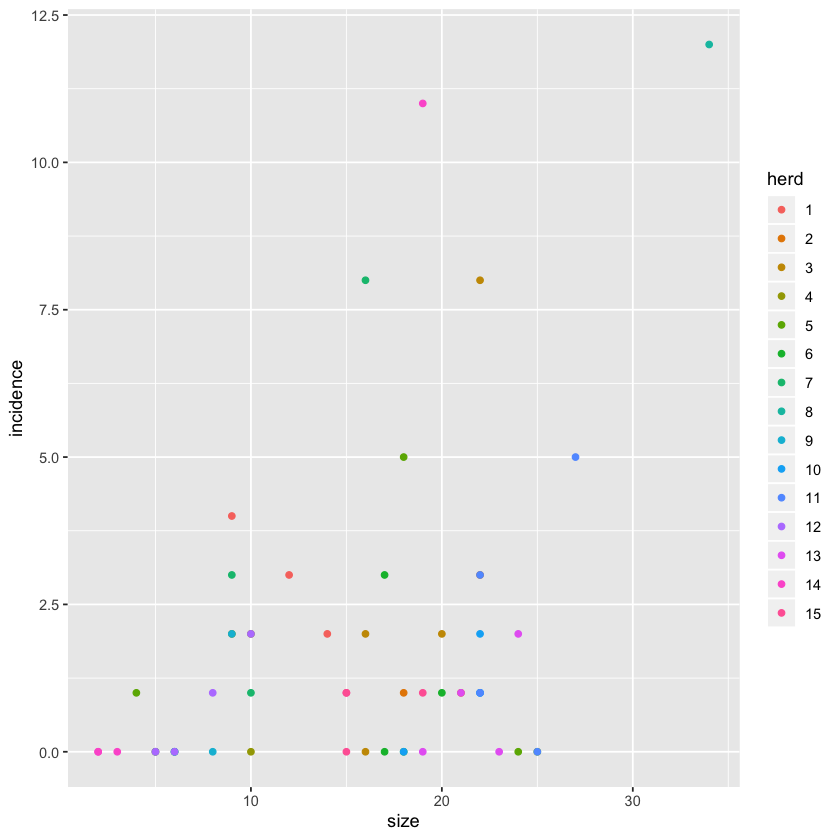

In [2]:
# Question 4a.

library(lme4)
library(ggplot2)
names(cbpp)
head(cbpp)
ggplot(aes(size, incidence, color = herd), data = cbpp) + 
geom_point()

In [4]:
# Question 4b.

lm.fit = lm(incidence ~ size, data = cbpp)
summary(lm.fit)


Call:
lm(formula = incidence ~ size, data = cbpp)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.1456 -1.5925 -0.4864  0.8006  8.6840 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)   
(Intercept) -0.31106    0.73554  -0.423  0.67405   
size         0.13827    0.04389   3.150  0.00266 **
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.432 on 54 degrees of freedom
Multiple R-squared:  0.1553,	Adjusted R-squared:  0.1396 
F-statistic: 9.926 on 1 and 54 DF,  p-value: 0.002657


The coefficients section tells us that the slope of herd size is significantly different from 0 (we can reject the null that $H_0: \beta_1 = 0$). The herd size affects CBPP incidence in a significant manner, and we can see that the direction is positive (each unit change increase in herd size brings up CBPP incidence by 0.13827). Our model predicts ~14% of the variance in CBPP incidence ($r^2$) and the model predicts more than chance (F-statistic: 9.93, p-value < 0.05).

In [16]:
# Question 4c.

lmer.fit1 = lmer(incidence ~ size + (size|herd), data = cbpp)
lmer.fit2 = lmer(incidence ~ size + (1|herd), data = cbpp)
print("LMER.FIT1")
summary(lmer.fit1)
print("LMER.FIT2")
summary(lmer.fit2)

boundary (singular) fit: see ?isSingular



[1] "LMER.FIT1"


Linear mixed model fit by REML ['lmerMod']
Formula: incidence ~ size + (size | herd)
   Data: cbpp

REML criterion at convergence: 240.3

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-1.7937 -0.5979 -0.1649  0.4926  2.5174 

Random effects:
 Groups   Name        Variance Std.Dev. Corr 
 herd     (Intercept) 0.5398   0.7347        
          size        0.0331   0.1819   -1.00
 Residual             2.4319   1.5595        
Number of obs: 56, groups:  herd, 15

Fixed effects:
            Estimate Std. Error t value
(Intercept) -0.54192    0.63637  -0.852
size         0.19645    0.06483   3.030

Correlation of Fixed Effects:
     (Intr)
size -0.822
convergence code: 0
boundary (singular) fit: see ?isSingular


[1] "LMER.FIT2"


Linear mixed model fit by REML ['lmerMod']
Formula: incidence ~ size + (1 | herd)
   Data: cbpp

REML criterion at convergence: 257.9

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-1.7326 -0.4817 -0.1526  0.3818  3.0017 

Random effects:
 Groups   Name        Variance Std.Dev.
 herd     (Intercept) 2.833    1.683   
 Residual             4.058    2.015   
Number of obs: 56, groups:  herd, 15

Fixed effects:
            Estimate Std. Error t value
(Intercept) -1.69665    0.96525  -1.758
size         0.23748    0.05264   4.511

Correlation of Fixed Effects:
     (Intr)
size -0.845

When including the random effect (size|herd) and looking at the t-value for size on incidence in the Fixed effects, it has slightly dropped to 3.03 (from 3.15 in the simple linear model). Thus, we are getting a slightly more conservative model fit on the fixed effect, but it does not seem to be that different.

In [17]:
# Question 4d.

ic = AIC(lm.fit, lmer.fit1, lmer.fit2)
ic
diff(ic$AIC)

,df,AIC
,<dbl>,<dbl>
lm.fit,3,262.4036
lmer.fit1,6,252.2996
lmer.fit2,4,265.8909


[1] -10.10405  13.59134

Looking at the AIC, the difference in AIC is not that big, but the more complex model (the mixed-effects model) accounts for slightly more variance in CBPP incidence than the simple linear model.

In [10]:
#Question 5a.

library(tidyverse)
d <- read.csv(file = "unrestricted_trimmed_1_7_2020_10_50_44.csv")
d1 <- select(d, Subject, Gender, Age, FS_IntraCranial_Vol, FS_Total_GM_Vol) %>% na.omit() %>% mutate(FS_IntraCranial_Vol_zscores = (FS_IntraCranial_Vol - mean(FS_IntraCranial_Vol))/sd(FS_IntraCranial_Vol),
       FS_Total_GM_Vol_zscores = (FS_Total_GM_Vol - mean(FS_Total_GM_Vol))/sd(FS_Total_GM_Vol))
head(d1)

,Subject,Gender,Age,FS_IntraCranial_Vol,FS_Total_GM_Vol,FS_IntraCranial_Vol_zscores,FS_Total_GM_Vol_zscores
,<int>,<fct>,<fct>,<dbl>,<int>,<dbl>,<dbl>
1,100206,M,26-30,1864518,807245,1.5004445,1.8088997
2,100307,F,26-30,1512540,664124,-0.3496739,-0.3260929
3,100408,M,31-35,1684117,726206,0.5521923,0.6000089
4,100610,M,26-30,1816044,762308,1.2456468,1.1385567
5,101006,F,31-35,1437868,579632,-0.7421782,-1.5864934
6,101107,M,22-25,1512727,665024,-0.3486914,-0.3126672


In [4]:
#Question 5b.

library(ggplot2)
glm.fit = glm(formula = Gender ~ FS_IntraCranial_Vol, data = d1, family = binomial)
summary(glm.fit)


Call:
glm(formula = Gender ~ FS_IntraCranial_Vol, family = binomial, 
    data = d1)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.5646  -0.6769  -0.1836   0.6434   3.5450  

Coefficients:
                      Estimate Std. Error z value Pr(>|z|)    
(Intercept)         -1.885e+01  1.113e+00  -16.94   <2e-16 ***
FS_IntraCranial_Vol  1.171e-05  6.934e-07   16.89   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 1534.13  on 1112  degrees of freedom
Residual deviance:  968.67  on 1111  degrees of freedom
AIC: 972.67

Number of Fisher Scoring iterations: 5


As you can see, if we accept an $\alpha = 0.05$ (i.e., p < 0.05 for determining statistical significance), then it  appears that intracranial volume measure predicts whether gender ends up being male or female. 

In [5]:
#Question 5c.

glm_prob_df = data.frame(predict(glm.fit, type = "response"))
colnames(glm_prob_df) = c('predicted_prob')
glm_prob_df$index = seq(1, nrow(glm_prob_df))
contrasts(d1$Gender)

,M
F,0
M,1


In [6]:
threshold = 0.50
glm_prob_df$predicted_binary = rep("Females")
glm_prob_df$predicted_binary[glm_prob_df$predicted_prob > threshold] = "Males"
confusion_df = data.frame(glm_prob_df$predicted_binary, d1$Gender)
colnames(confusion_df) = c('predicted', 'actual')
table(confusion_df)

prediction_accuracy = (506+394)/1113
prediction_accuracy

         actual
predicted   F   M
  Females 506 113
  Males   100 394

[1] 0.8086253

This means that we are correct ~81% of the time in estimating whether gender will be male or female given intracranial volume. This represents error on the training set.

In [61]:
# Question 5d.

library(boot)
glm.fit = glm(formula = Gender ~ FS_IntraCranial_Vol, data = d1, family = binomial)
cv.err = cv.glm(d1, glm.fit, K = nrow(d1))
cv.err$delta

[1] 0.1367901 0.1367898

Here the first entry of cv.err$delta is the raw cross-validation estimate of prediction error and the second is the adjusted cross-validation estimate designed to compensate for the bias introduced by not using leave-one-out cross-validation.

In [100]:
# Question 5e.

library(boot)
glm.fit = glm(formula = Gender ~ FS_IntraCranial_Vol, data = d1, family = binomial)
cv.err.1 = cv.glm(d1, glm.fit, K = 10)
cv.err.1$delta

[1] 0.1366694 0.1366364

The K-fold cross-validation is the same as the LOOCV. This suggests that the k-fold cross validation does not provide much better estimates of the true test error than LOOCV in this example.

Call:
lda(Gender ~ FS_IntraCranial_Vol, data = d1)

Prior probabilities of groups:
        F         M 
0.5444744 0.4555256 

Group means:
  FS_IntraCranial_Vol
F             1471135
M             1708069

Coefficients of linear discriminants:
                            LD1
FS_IntraCranial_Vol 6.69985e-06

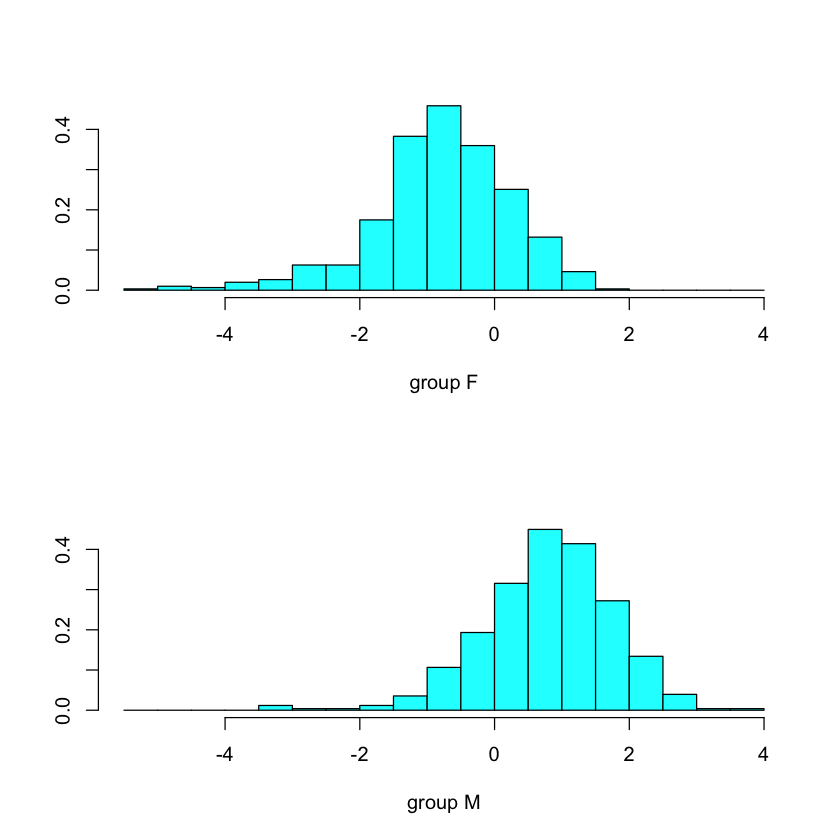

In [15]:
# Question 5f.
library(MASS)
lda.fit = lda(Gender ~ FS_IntraCranial_Vol, data = d1)
lda.fit
plot(lda.fit)

This indicates that around 54% of the training observations correspond to when Gender is female.

In [24]:
train_idx = (d1$Subject<500000)
d1_test = d1[!train_idx,]
dim(d1_test)
Gender.Subject_test = d1_test$Gender

[1] 353   7

In [25]:
lda.pred = predict(lda.fit, d1_test)
lda.class = lda.pred$class
table(lda.class, Gender.Subject_test)
mean(lda.class == Gender.Subject_test)

         Gender.Subject_test
lda.class   F   M
        F 148  37
        M  33 135

[1] 0.8016997

So we now see that the LDA is performing just as well as the logistic regression at ~80% test set accuracy.